In [19]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import streamlit as st

In [4]:
df=pd.read_csv('spam.csv')
df


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [6]:
df.shape

(5572, 2)

In [7]:
df.describe().T

,count,unique,top,freq
Category,5572,2,ham,4825
Message,5572,5157,"Sorry, I'll call later",30


In [8]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [9]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [11]:
df.drop_duplicates().sum()

Category    hamhamspamhamhamspamhamhamspamspamhamspamspamh...
Message     Go until jurong point, crazy.. Available only ...
dtype: object

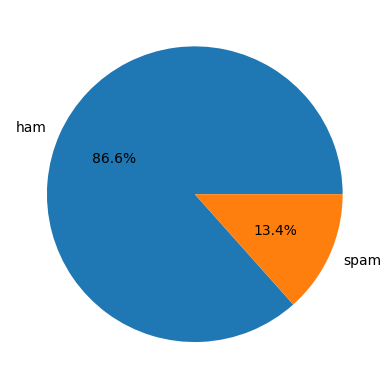

In [12]:
import matplotlib.pyplot as plt
values = df['Category'].value_counts()
labels = values.index   
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()


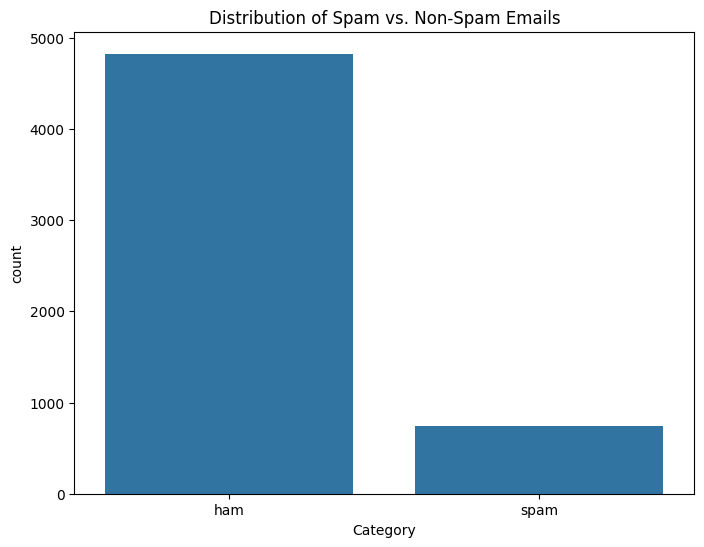

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.show()


In [15]:
df['Category'] = df['Category'].replace(['ham', 'spam'], ['Not Spam', 'Spam'])
df

,Category,Message
0,Not Spam,"Go until jurong point, crazy.. Available only ..."
1,Not Spam,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not Spam,U dun say so early hor... U c already then say...
4,Not Spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,Spam,This is the 2nd time we have tried 2 contact u...
5568,Not Spam,Will ü b going to esplanade fr home?
5569,Not Spam,"Pity, * was in mood for that. So...any other s..."
5570,Not Spam,The guy did some bitching but I acted like i'd...


In [21]:
msg = df['Message']
cat = df['Category']
(msg_train, msg_test, cat_train, cat_test) = train_test_split(msg, cat, test_size=0.2)

In [23]:
cv = CountVectorizer(stop_words='english')

In [24]:
features = cv.fit_transform(msg_train)

In [25]:
model = MultinomialNB()

In [26]:
model.fit(features, cat_train)

MultinomialNB()

In [27]:
feature_test = cv.transform(msg_test)

In [28]:
accuracy = model.score(feature_test, cat_test)
print("Accuracy:", accuracy)

Accuracy: 0.9802690582959641


In [29]:
def predict(message):
    predictinput = cv.transform([message]).toarray()  # Transform the input message into a numerical vector
    result = model.predict(predictinput)  # Predict the category of the input message
    return result

In [30]:
st.set_page_config(page_title="Spam Detection", page_icon="📧")

In [31]:
st.title("Spam Detection 📧")
st.header("Enter a message to check if it's spam or not:")

2024-09-28 22:04:51.337 
  command:

    streamlit run C:\Users\pc\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [32]:
input_msg = st.text_input('Type your message here...')

2024-09-28 22:05:06.299 Session state does not function when running a script without `streamlit run`


In [33]:
st.markdown("<style>.stButton > button {background-color: #007bff; color: white; font-size: 24px; padding: 10px 20px;}</style>", unsafe_allow_html=True)

DeltaGenerator()

In [34]:
if st.button('Validate'):
    output = predict(input_msg)   
    if output[0] == 'Not Spam':
        st.success("This message is **Not Spam**!", icon="✅")  
    else:
        st.error("This message is **Spam**!", icon="❌")  

In [35]:
df

,Category,Message
0,Not Spam,"Go until jurong point, crazy.. Available only ..."
1,Not Spam,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not Spam,U dun say so early hor... U c already then say...
4,Not Spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,Spam,This is the 2nd time we have tried 2 contact u...
5568,Not Spam,Will ü b going to esplanade fr home?
5569,Not Spam,"Pity, * was in mood for that. So...any other s..."
5570,Not Spam,The guy did some bitching but I acted like i'd...
